In [1]:
import os

if not os.path.exists("datasets/"):
    os.mkdir("datasets")

In [3]:
!wget --header="User-Agent: Mozilla/5.0" -O datasets/steam_reviews.json.gz http://cseweb.ucsd.edu/~wckang/steam_reviews.json.gz
!wget --header="User-Agent: Mozilla/5.0" -O datasets/steam_games.json.gz http://cseweb.ucsd.edu/~wckang/steam_games.json.gz

--2025-10-20 13:14:27--  http://cseweb.ucsd.edu/~wckang/steam_reviews.json.gz
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cseweb.ucsd.edu//~wckang/steam_reviews.json.gz [following]
--2025-10-20 13:14:27--  https://cseweb.ucsd.edu//~wckang/steam_reviews.json.gz
Connecting to cseweb.ucsd.edu (cseweb.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1338063248 (1.2G) [application/x-gzip]
Saving to: ‘datasets/steam_reviews.json.gz’

datasets/steam_revi 100%[===================>]   1.25G  2.99MB/s    in 3m 46s  

2025-10-20 13:18:35 (5.64 MB/s) - ‘datasets/steam_reviews.json.gz’ saved [1338063248/1338063248]

--2025-10-20 13:18:35--  http://cseweb.ucsd.edu/~wckang/steam_games.json.gz
Resolving cseweb.ucsd.edu (cseweb.ucsd.edu)... 132.239.8.30
Connecting to cseweb.ucsd.edu (cseweb.ucsd

In [6]:
import gzip
import shutil

# Ruta del archivo .gz
gz_path = "datasets/steam_games.json.gz"

# Ruta de destino sin compresión
output_path = "datasets/steam_games.json"

# Descomprimir
with gzip.open(gz_path, 'rb') as f_in:
    with open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


# Ruta del archivo .gz
gz_path = "datasets/steam_reviews.json.gz"

# Ruta de destino sin compresión
output_path = "datasets/steam_new.json"

# Descomprimir
with gzip.open(gz_path, 'rb') as f_in:
    with open(output_path, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


In [1]:
#codigo para cargar los datos en 2 df, uno para el game_info y otro para las reviews

import pandas as pd
import ast

def json_line_generator(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                data_object = ast.literal_eval(line)
                yield data_object


df_games = pd.DataFrame(json_line_generator("datasets/steam_games.json"))
df_reviews = pd.DataFrame(json_line_generator("datasets/steam_new.json"))
print("Número total de registros cargados en df_games:", len(df_games))

print("\nNúmero total de registros cargados en df_reviews:", len(df_reviews))

Número total de registros cargados en df_games: 32135

Número total de registros cargados en df_reviews: 7793069


In [2]:
#poner una columna de el nombre del juego en el df de reviews
df_games_info = df_games[['id', 'title']].rename(columns={'id': 'product_id', 'title': 'game_title'})
df_reviews = pd.merge(
    df_reviews,                       
    df_games_info,                    
    on='product_id',                  
    how='left'                        
)

In [3]:
#verificación
df_reviews.head(5)

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id,game_title
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN,Psi Project
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN,Gunspell - Steam Edition
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN,Gunspell - Steam Edition
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN,Batman: Arkham Asylum Game of the Year Edition
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075,Batman: Arkham Asylum Game of the Year Edition


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    if text is None or text == "":
        return []
    
    #minuscula + ruido
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #URLs
    text = re.sub(r'<.*?>', '', text)       #etiquetas HTML
    text = re.sub(r'[^a-záéíóúüñ\s]', '', text) #caracteres no alfabéticos 

    #tokenizacion
    tokens = word_tokenize(text)
    
    #stopwords 
    spanish_stopwords = set(stopwords.words('spanish'))
    english_stopwords = set(stopwords.words('english'))
    all_stopwords = spanish_stopwords.union(english_stopwords)

    filtered_tokens = [word for word in tokens if word not in all_stopwords and len(word) > 1]
    
    return filtered_tokens

df_reviews['processed_tokens'] = df_reviews['text'].apply(preprocess_text)
df_reviews['processed_text'] = df_reviews['processed_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
df_reviews.head(5)

Número total de reviews procesadas: 7671591
Loss after epoch 0: 63137112.0
Loss after epoch 1: 12479360.0
Loss after epoch 2: 9215024.0
Loss after epoch 3: 8965472.0
Loss after epoch 4: 8744864.0
Loss after epoch 5: 8148264.0
Loss after epoch 6: 7645312.0
Loss after epoch 7: 7037312.0
Loss after epoch 8: 6017128.0
Loss after epoch 9: 2827880.0

Vocabulario construido con 257921 palabras únicas


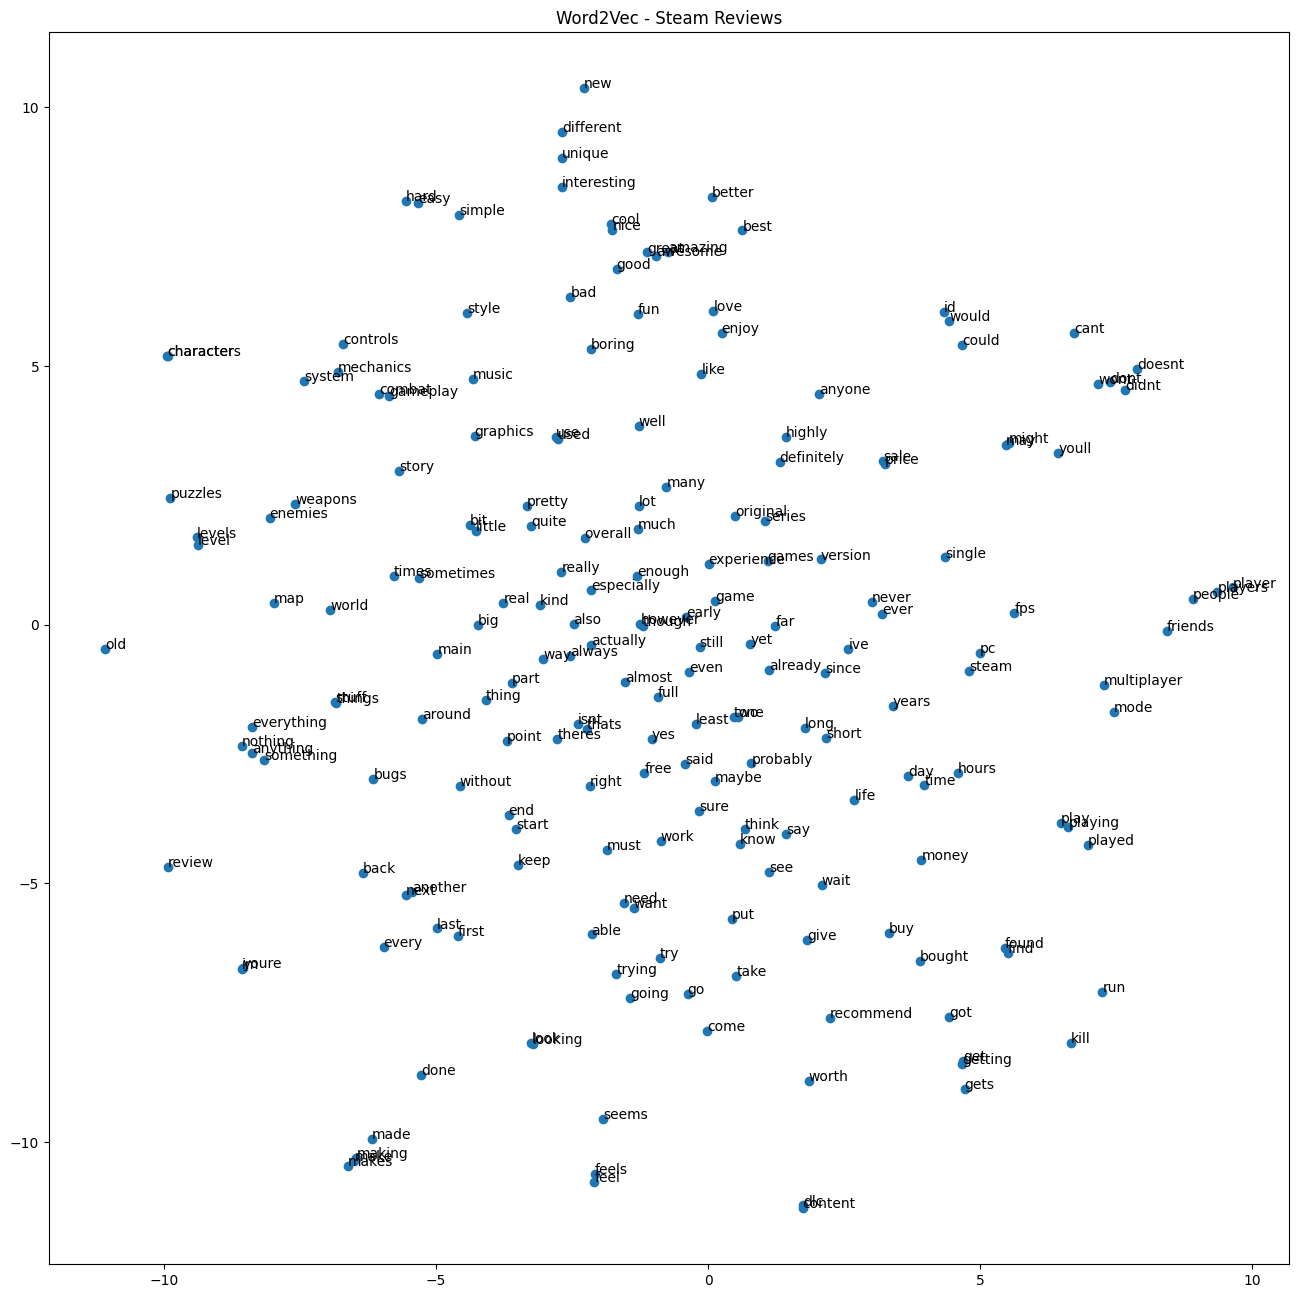


Modelo guardado como 'steam_reviews_w2v_model'

Ejemplos de palabras similares

Palabras similares a 'game':
  gameit: 0.5663
  games: 0.5609
  title: 0.5608
  however: 0.5150
  gamebut: 0.5136

Palabras similares a 'good':
  decent: 0.7985
  great: 0.7951
  nice: 0.7136
  awesome: 0.6699
  solid: 0.6425

Palabras similares a 'bad':
  terrible: 0.7689
  horrible: 0.7240
  awful: 0.6731
  poor: 0.6440
  good: 0.6344

Palabras similares a 'fun':
  enjoyable: 0.7237
  entertaining: 0.6946
  addicting: 0.6389
  addictive: 0.5894
  funthe: 0.5676

Palabras similares a 'play':
  paly: 0.6899
  playing: 0.6874
  toaround: 0.5264
  playbut: 0.5056
  played: 0.4983


In [6]:
#Crear word2vec con los tokens procesados

import gensim.models
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

sentences = [tokens for tokens in df_reviews['processed_tokens'].values if len(tokens) > 0]

print(f"Número total de reviews procesadas: {len(sentences)}")

#crear Word2Vec
epoch_logger = EpochLogger()

model = gensim.models.Word2Vec(
    sentences=sentences, 
    vector_size=200, 
    window=5, 
    min_count=5,  
    compute_loss=True, 
    callbacks=[epoch_logger], 
    negative=5, 
    epochs=10,  
    workers=4  
    
)

print(f"\nVocabulario construido con {len(model.wv)} palabras únicas")

# Visualización con TSNE
# Selecciona las primeras 200 palabras más frecuentes
words = list(model.wv.index_to_key)[:200]
vectors = [model.wv[word] for word in words]

# Aplica TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_vectors = tsne.fit_transform(np.array(vectors))

plt.figure(figsize=(16, 16))
plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (tsne_vectors[i, 0], tsne_vectors[i, 1]))

plt.title('Word2Vec - Steam Reviews')
plt.show()

#guardar modelo

if not os.path.exists("modelos/"):
    os.mkdir("modelos")
model.save("modelos/steam_reviews_w2v_model")
print("\nModelo guardado como 'steam_reviews_w2v_model'")

#ejemplos
print("\nEjemplos de palabras similares")
test_words = ['game', 'good', 'bad', 'fun', 'play']
for word in test_words:
    if word in model.wv:
        print(f"\nPalabras similares a '{word}':")
        similar = model.wv.most_similar(word, topn=5)
        for similar_word, score in similar:
            print(f"  {similar_word}: {score:.4f}")

In [14]:
print("\nCreando vectores de documento para cada review...")

def get_doc_embedding(tokens, model):
    """
    Usa el método nativo de gensim para obtener embedding promedio
    """
    # Filtrar tokens que están en el vocabulario
    valid_tokens = [token for token in tokens if token in model.wv]
    
    if not valid_tokens:
        return np.zeros(model.vector_size)
    
    # Obtener embeddings y promediar
    embeddings = model.wv[valid_tokens]
    return np.mean(embeddings, axis=0)

df_reviews['doc_vector'] = df_reviews['processed_tokens'].apply(
    lambda tokens: get_doc_embedding(tokens, model)
)
print(f"Vectores creados con dimensión: {model.vector_size}")


Creando vectores de documento para cada review...


In [13]:
df_reviews.head(5)

,username,hours,products,product_id,page_order,date,text,early_access,page,found_funny,compensation,user_id,game_title,processed_tokens,processed_text
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN,Psi Project,"[would, acceptable, entertainment, even, back,...",would acceptable entertainment even back day g...
1,₮ʜᴇ Wᴀʀᴛᴏɴ,51.1,769.0,328100,0,2017-12-27,looks like a facebook game,False,1,NaN,NaN,NaN,Gunspell - Steam Edition,"[looks, like, facebook, game]",looks like facebook game
2,hello?<,14.6,2.0,328100,1,2017-10-16,Better than Minecraft,False,1,2.0,Product received for free,NaN,Gunspell - Steam Edition,"[better, minecraft]",better minecraft
3,Cyderine916,5.0,64.0,35140,0,2018-01-04,I love and idolized Batman and this game is Ma...,False,1,NaN,NaN,NaN,Batman: Arkham Asylum Game of the Year Edition,"[love, idolized, batman, game, masterpiece]",love idolized batman game masterpiece
4,DarklyThinking,16.6,577.0,35140,1,2018-01-04,Still worth playing in 2018.\nProbably my favo...,False,1,NaN,NaN,76561198007483075,Batman: Arkham Asylum Game of the Year Edition,"[still, worth, playing, probably, favorite, ba...",still worth playing probably favorite batman g...


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_reviews(review_index, df_reviews, top_n=5):
    """
    Encuentra las reviews más similares a una dada
    """
    target_vector = df_reviews.iloc[review_index]['doc_vector'].reshape(1, -1)
    
    # Calcular similitud con todas las reviews
    all_vectors = np.stack(df_reviews['doc_vector'].values)
    similarities = cosine_similarity(target_vector, all_vectors)[0]
    
    # Obtener índices de las más similares (excluyendo la misma review)
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    
    print(f"\n{'='*80}")
    print(f"REVIEW ORIGINAL (índice {review_index}):")
    print(f"{'='*80}")
    print(f"Juego: {df_reviews.iloc[review_index]['game_title']}")
    print(f"Usuario: {df_reviews.iloc[review_index]['username']}")
    print(f"Texto: {df_reviews.iloc[review_index]['text'][:200]}...")
    
    print(f"\n{'='*80}")
    print(f"TOP {top_n} REVIEWS SIMILARES:")
    print(f"{'='*80}")
    
    for i, idx in enumerate(similar_indices, 1):
        print(f"\n{i}. Similitud: {similarities[idx]:.4f}")
        print(f"   Juego: {df_reviews.iloc[idx]['game_title']}")
        print(f"   Usuario: {df_reviews.iloc[idx]['username']}")
        print(f"   Texto: {df_reviews.iloc[idx]['text'][:150]}...")

# Ejemplo de uso
find_similar_reviews(0, df_reviews, top_n=5)

NameError: name 'df_reviews' is not defined

In [ ]:
def semantic_search(query, df_reviews, model, top_n=10):
    """
    Busca reviews similares a una consulta de texto
    """
    # Preprocesar la consulta
    query_tokens = preprocess_text(query)
    query_vector = get_document_vector(query_tokens, model).reshape(1, -1)
    
    # Calcular similitud
    all_vectors = np.stack(df_reviews['doc_vector'].values)
    similarities = cosine_similarity(query_vector, all_vectors)[0]
    
    # Top resultados
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    print(f"\n{'='*80}")
    print(f"BÚSQUEDA: '{query}'")
    print(f"{'='*80}")
    
    for i, idx in enumerate(top_indices, 1):
        print(f"\n{i}. Similitud: {similarities[idx]:.4f}")
        print(f"   Juego: {df_reviews.iloc[idx]['game_title']}")
        print(f"   Usuario: {df_reviews.iloc[idx]['username']}")
        print(f"   Texto: {df_reviews.iloc[idx]['text'][:200]}...")

# Ejemplos de búsqueda
semantic_search("amazing graphics and gameplay", df_reviews, model, top_n=5)
semantic_search("terrible bugs and crashes", df_reviews, model, top_n=5)
semantic_search("great story multiplayer fun", df_reviews, model, top_n=5)